                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
1986-03-13  0.088542  0.101563  0.088542  0.097222   0.060055  1031788800
1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062199   308160000
1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063272   133171200
1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061663    67766400
1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060591    47894400


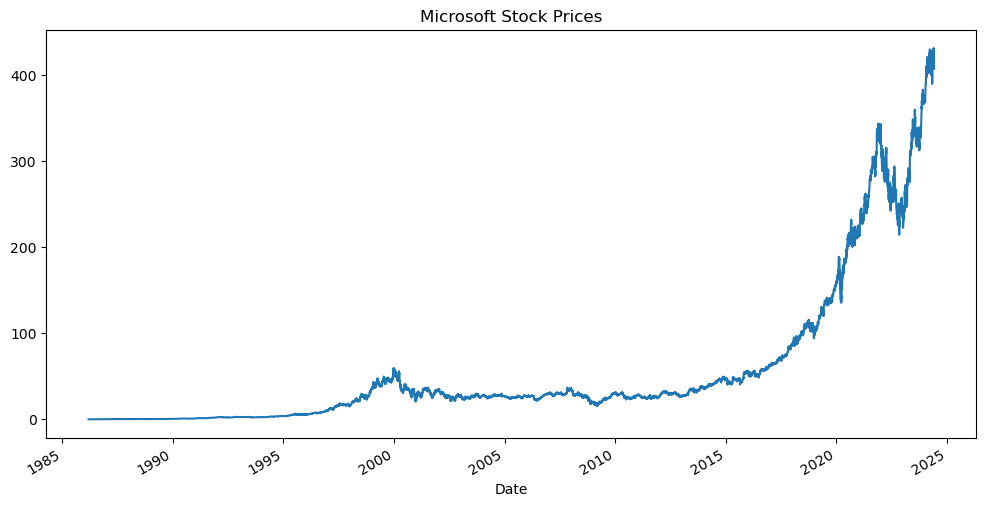

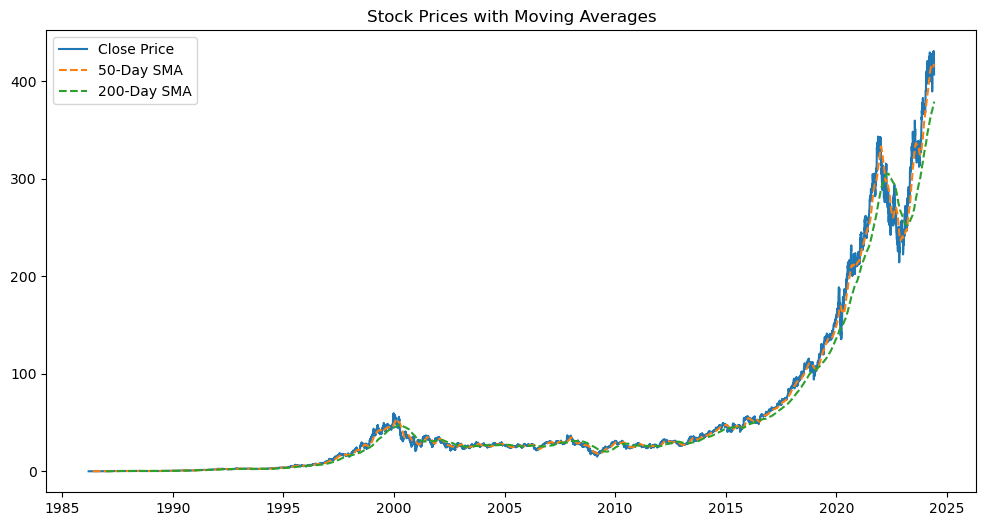

C:\Users\Elbraa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Elbraa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Elbraa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Elbraa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error: 31326.694809179273


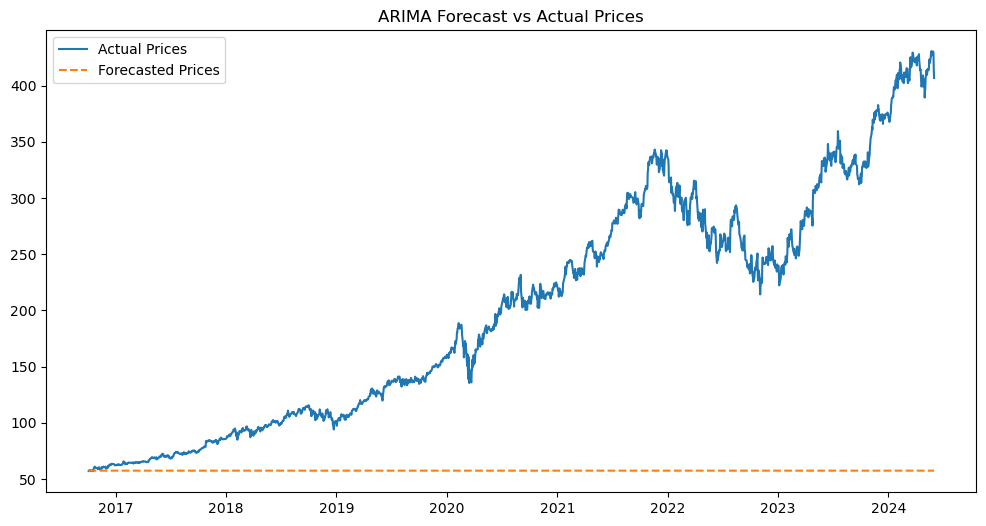

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_csv('Microsoft Dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.head())
df['Close'].plot(figsize=(12,6))
plt.title('Microsoft Stock Prices')
plt.show()

df = df.dropna()

df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_50'], label='50-Day SMA', linestyle='--')
plt.plot(df['SMA_200'], label='200-Day SMA', linestyle='--')
plt.title('Stock Prices with Moving Averages')
plt.legend()
plt.show()

train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

error = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {error}')

plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, forecast, label='Forecasted Prices', linestyle='--')
plt.title('ARIMA Forecast vs Actual Prices')
plt.legend()
plt.show()